In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, GRU, Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

1418/1418 [==============================] - 38s 26ms/step
CNN-BiLSTM Accuracy: 0.8989086098555837
CNN-BiLSTM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     14089
           1       0.88      0.91      0.89      4664
           2       0.90      0.89      0.89      8938
           3       0.92      0.87      0.89      7741
           4       0.91      0.84      0.87      4844
           5       0.89      0.92      0.90      5079

    accuracy                           0.90     45355
   macro avg       0.90      0.89      0.89     45355
weighted avg       0.90      0.90      0.90     45355

1418/1418 [==============================] - 28s 19ms/step

CNN-BiGRU Accuracy: 0.894807628706868
CNN-BiGRU Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     14089
           1       0.92      0.86      0.89      4664
           2       0.89      0

<ipython-input-6-f66459b246c8>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=accuracies, palette="viridis")


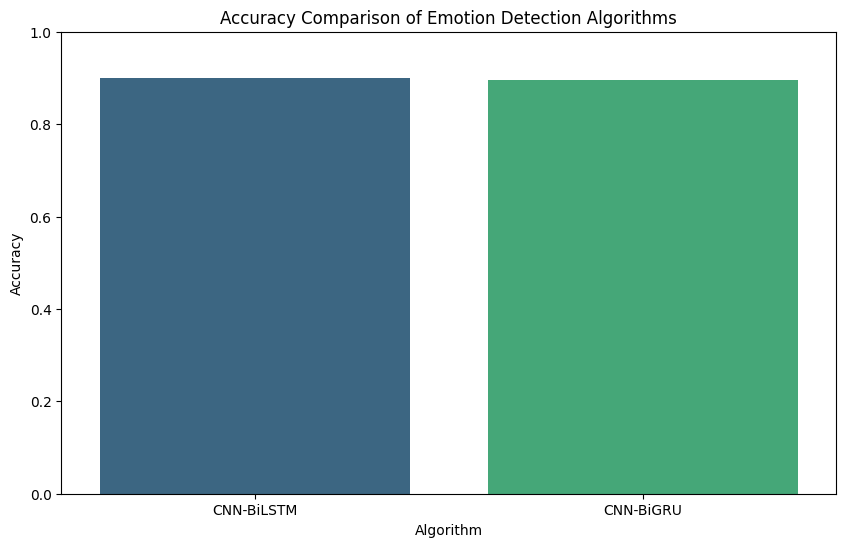

In [6]:
def load_data(filename):
    """Load dataset from CSV file."""
    column_names = ['tweet', 'emotion']
    return pd.read_csv(filename,
                    names=column_names,
                    header=None)

def preprocess_data(data):
    """Preprocess the dataset by splitting into features and labels."""
    X = data['tweet']
    y = data['emotion']
    return X, y

def encode_labels(y):
    """Encode categorical labels into numerical values."""
    encoder = LabelEncoder()
    return encoder.fit_transform(y)

def tokenize_sequences(X_train, X_test, max_words, max_sequence_length):
    """Tokenize text data and pad sequences to a fixed length."""
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(X_train)
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_test_seq = tokenizer.texts_to_sequences(X_test)
    X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
    X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)
    return X_train_pad, X_test_pad

def build_cnn_bilstm_model(embedding_dim, max_sequence_length, max_words, num_classes):
    """Build CNN-BiLSTM model."""
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def build_cnn_bigru_model(embedding_dim, max_sequence_length, max_words, num_classes):
    """Build CNN-BiGRU model."""
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(Bidirectional(GRU(128)))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, batch_size, epochs):
    """Train and evaluate the model."""
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)
    predictions_prob = model.predict(X_test)
    predictions = np.argmax(predictions_prob, axis=1)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return accuracy, report


def plot_comparison(accuracies, algorithms):
    """Plot a comparison of accuracies for different algorithms."""
    plt.figure(figsize=(10, 6))
    sns.barplot(x=algorithms, y=accuracies, palette="viridis")
    plt.title('Accuracy Comparison of Emotion Detection Algorithms')
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

# Load dataset
filename = '/content/drive/MyDrive/large_emotion_data/EmotionDataset06.csv'
data = load_data(filename)

# Preprocess data
X, y = preprocess_data(data)
y = encode_labels(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_sequence_length = 100
X_train_pad, X_test_pad = tokenize_sequences(X_train, X_test, max_words, max_sequence_length)

# Convert labels to one-hot encoding
num_classes = len(set(y))
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Build and train CNN-BiLSTM model
cnn_bilstm_model = build_cnn_bilstm_model(100, max_sequence_length, max_words, num_classes)
cnn_bilstm_accuracy, cnn_bilstm_report = train_and_evaluate_model(cnn_bilstm_model, X_train_pad, y_train_one_hot, X_test_pad, y_test, 32, 1)
print("CNN-BiLSTM Accuracy:", cnn_bilstm_accuracy)
print("CNN-BiLSTM Classification Report:")
print(cnn_bilstm_report)

# Build and train CNN-BiGRU model
cnn_bigru_model = build_cnn_bigru_model(100, max_sequence_length, max_words, num_classes)
cnn_bigru_accuracy, cnn_bigru_report = train_and_evaluate_model(cnn_bigru_model, X_train_pad, y_train_one_hot, X_test_pad, y_test, 32, 1)
print("\nCNN-BiGRU Accuracy:", cnn_bigru_accuracy)
print("CNN-BiGRU Classification Report:")
print(cnn_bigru_report)

# Plot comparison of accuracies
accuracies = {'CNN-BiLSTM': cnn_bilstm_accuracy, 'CNN-BiGRU': cnn_bigru_accuracy}
plot_comparison(accuracies.values(), accuracies.keys())
